In [1]:
#Activate the environment
#conda activate python_course

#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States') ].copy()

#Drop NaN values from the column for plotting
df_DA_US =  df_DA_US.dropna(subset=['salary_year_avg'])

c:\Users\emili\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df_DA_US.explode('job_skills')

In [15]:
# Grafico para os top skills  e para os skills mais comuns na amostra com respectivos salarios medianos
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)



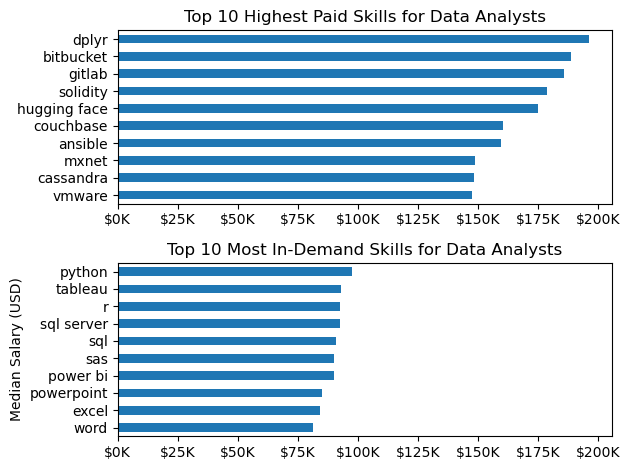

In [16]:
fig, ax = plt.subplots(2,1)

#Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh',y='median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh',y='median', ax = ax[1], legend = False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())    # Set the same x-axis limit as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()
